### Geospatial analysis with Python and R project
#### Bakhtiyar Garashov
#### Project is available on this [repo]()
#### Project idea
Within the scope of this project Airbnb dataset of Munich city is analyzed. Static maps of the number of accomodation and average price of staying per neighbourhood calculated. Also, dynamic/interactive maps of each accomodation and will be shown via using folium library of Python. Below you can find the datasets, source and metadata as well.
1. Listings.csv- contains extensive information about each accomodation. Has 75 rows attributes
2. Reviews.csv- stores customer review of each accomodation
3. Neighbourhoods.geojson- spatial dataset of neighbourhoods of Munich in WGS84
#### All the data can be found on this [url](http://insideairbnb.com/get-the-data.html)



In [1]:
# necessary library imports for project
import pandas as pd
import geopandas as gpd
import pysal.viz.mapclassify as mc
import collections

#for scale bar
from matplotlib_scalebar.scalebar import ScaleBar

# custom legend and map
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# importing neighbourhoods of Munich geojson dataset 
munich_neighbourhoods="neighbourhoods.geojson"
munich_gdf=gpd.read_file(munich_neighbourhoods)
munich_gdf

,neighbourhood,neighbourhood_group,geometry
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48..."
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48..."
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48..."
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48..."
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48..."
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48..."
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48..."
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48..."
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48..."
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48..."


In [3]:
# importing all the airbnb list
all_list="listings.csv"
airbnb_listing= pd.read_csv(all_list)

airbnb_gdf=gpd.GeoDataFrame(airbnb_listing, geometry=gpd.points_from_xy(airbnb_listing.longitude,airbnb_listing.latitude))
airbnb_gdf

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,97945,https://www.airbnb.com/rooms/97945,20201026064122,2020-10-26,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,9.0,9.0,NaN,f,2,2,0,0,1.21,POINT (11.48782 48.11476)
1,170154,https://www.airbnb.com/rooms/170154,20201026064122,2020-10-26,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,10.0,10.0,NaN,f,1,0,1,0,4.30,POINT (11.52733 48.10751)
2,170815,https://www.airbnb.com/rooms/170815,20201026064122,2020-10-26,Your own flat near central station!,<b>The space</b><br />It's a 1-room studio app...,NaN,https://a0.muscache.com/pictures/86b4037c-098a...,814793,https://www.airbnb.com/users/show/814793,...,9.0,9.0,NaN,f,1,1,0,0,0.57,POINT (11.54154 48.16132)
3,171749,https://www.airbnb.com/rooms/171749,20201026064122,2020-10-26,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,"Nearby is the FC Bayern Munich area, about 10 ...",https://a0.muscache.com/pictures/88ca5688-2b45...,819382,https://www.airbnb.com/users/show/819382,...,10.0,10.0,NaN,t,1,0,1,0,3.15,POINT (11.57843 48.10583)
4,172672,https://www.airbnb.com/rooms/172672,20201026064122,2020-10-26,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/41728512/72fd...,823913,https://www.airbnb.com/users/show/823913,...,10.0,10.0,NaN,f,2,1,1,0,2.72,POINT (11.56366 48.16341)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,46025001,https://www.airbnb.com/rooms/46025001,20201026064122,2020-10-26,München Zuhause mit Aussicht 22,Stay stylish - das Motto der Marke Rilano 24|7...,"In der Parkstadt Schwabing, auch ""Silicon Schw...",https://a0.muscache.com/pictures/miso/Hosting-...,364189334,https://www.airbnb.com/users/show/364189334,...,NaN,NaN,NaN,t,23,0,23,0,NaN,POINT (11.59589 48.18420)
4690,46025035,https://www.airbnb.com/rooms/46025035,20201026064122,2020-10-26,München Zuhause mit Aussicht 23,Stay stylish - das Motto der Marke Rilano 24|7...,"In der Parkstadt Schwabing, auch ""Silicon Schw...",https://a0.muscache.com/pictures/miso/Hosting-...,364189334,https://www.airbnb.com/users/show/364189334,...,NaN,NaN,NaN,t,23,0,23,0,NaN,POINT (11.59590 48.18446)
4691,46033008,https://www.airbnb.com/rooms/46033008,20201026064122,2020-10-26,"Schöne, helle Wohnung mit Terrasse","Ich vermiete meine super schöne, helle 2 Zimme...",NaN,https://a0.muscache.com/pictures/af389bf3-a320...,18190559,https://www.airbnb.com/users/show/18190559,...,NaN,NaN,NaN,f,1,1,0,0,NaN,POINT (11.57780 48.11368)
4692,46034397,https://www.airbnb.com/rooms/46034397,20201026064122,2020-10-26,Hanin Room,NaN,NaN,https://a0.muscache.com/pictures/f6876bee-6315...,365628095,https://www.airbnb.com/users/show/365628095,...,NaN,NaN,NaN,t,2,2,0,0,NaN,POINT (11.56165 48.13728)


In [4]:
def check_contain(row):
    count=0
    for each_point in airbnb_gdf.geometry:
        if row["geometry"].contains(each_point):
            count+=1
    
    return count
        
        
munich_gdf['count_data'] = munich_gdf.apply(check_contain, axis=1)

munich_gdf


,neighbourhood,neighbourhood_group,geometry,count_data
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",160
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",533
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",363
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",318
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",279
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48...",158
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48...",178
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48...",158
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48...",287
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48...",107


In [5]:
# data classification (Natural breaks)

n_classes = 6

classifier = mc.NaturalBreaks.make(k=n_classes)

munich_gdf['count_class'] = munich_gdf[['count_data']].apply(classifier)

munich_gdf

,neighbourhood,neighbourhood_group,geometry,count_data,count_class
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",160,2
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",533,5
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",363,4
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",318,4
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",279,4
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48...",158,2
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48...",178,2
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48...",158,2
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48...",287,4
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48...",107,1


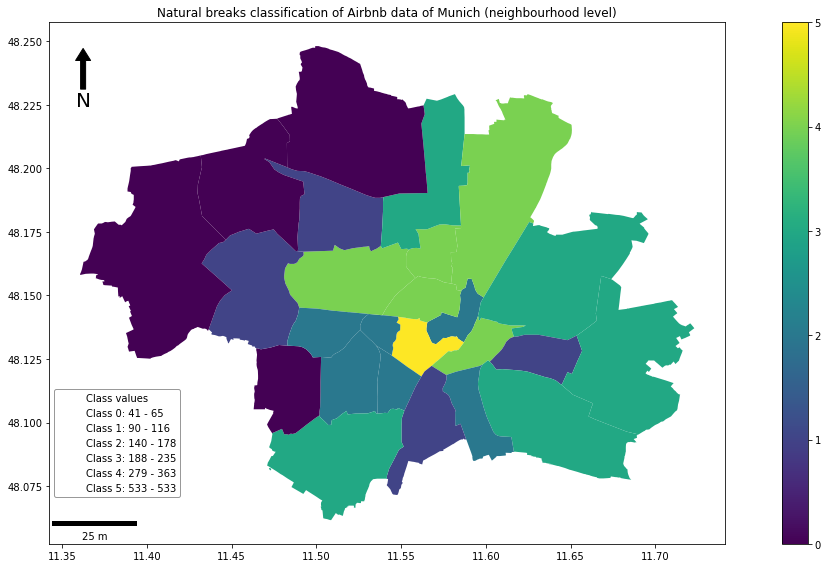

In [6]:
# data visualization



# add values of each class as legend
# reference https://kodu.ut.ee/~kmoch/geopython2020/L4/reclassify.html
grouped = munich_gdf.groupby('count_class')
legend_dict = collections.OrderedDict([])
for cl, valds in grouped:
    minv = valds['count_data'].min()
    maxv = valds['count_data'].max()
    legend_dict.update({"Class {}: {} - {}".format(cl, minv, maxv): "white"})

patchList = []
for key in legend_dict:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patchList.append(data_key)



# visualize map

fig, ax = plt.subplots(figsize=(16, 8))

scalebar = ScaleBar(500,location="lower left",height_fraction=0.01) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)

munich_gdf.plot(ax=ax,column="count_class",lw=0.7,legend=True)
plt.legend(handles=patchList, loc='lower center', bbox_to_anchor=(0.1, 0.08), ncol=1,title='Class values',edgecolor="gray")
# adding north arrow to map
x, y, arrow_length = 0.05, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

plt.title("Natural breaks classification of Airbnb data of Munich (neighbourhood level)")
plt.tight_layout()


plt.savefig('../airbnb_natural_breaks.png', bbox_inches='tight')


In [7]:
munich_gdf

,neighbourhood,neighbourhood_group,geometry,count_data,count_class
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",160,2
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",533,5
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",363,4
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",318,4
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",279,4
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48...",158,2
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48...",178,2
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48...",158,2
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48...",287,4
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48...",107,1
